In [5]:
# Installer/mettre à jour les librairies nécessaires
!pip install --upgrade pandas scikit-learn matplotlib seaborn numpy plotly --force-reinstall

# Importer les bibliothèques
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


  Using cached pandas-2.2.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (89 kB)
  Using cached scikit_learn-1.6.1-cp313-cp313-macosx_12_0_arm64.whl.metadata (31 kB)
  Using cached matplotlib-3.10.1-cp313-cp313-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached numpy-2.2.3-cp313-cp313-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached plotly-6.0.0-py3-none-any.whl.metadata (5.6 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2025.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached scipy-1.15.2-cp313-cp313-macosx_14_0_arm64.whl.metadata (61 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
  Using cached contourpy-1.3.1-cp313-cp313-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none

In [6]:
# Import des bibliothèques nécessaires
import pandas as pd


# Lire le fichier train.csv et test.csv
df = pd.read_csv("train.csv")
file2 = pd.read_csv("test.csv")

# Afficher les premières lignes du dataset
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# Compter les valeurs manquantes dans chaque colonne
print(df.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [8]:
file2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
# Importation des bibliothèques nécessaires pour l'encodage
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Vérification si les colonnes 'Sex' et 'Embarked' existent dans le DataFrame
if 'Sex' in df.columns and 'Embarked' in df.columns:
    
    # **1. Label Encoding pour la colonne "Sex"**
    # Le LabelEncoder transforme les catégories en valeurs numériques (ex : 'male' -> 1, 'female' -> 0).
    # Cela est utile pour les modèles qui ne peuvent pas traiter des données catégorielles directement.
    label_encoder = LabelEncoder()
    df['Sex_Encoded'] = label_encoder.fit_transform(df['Sex'])  # Création d'une nouvelle colonne encodée pour "Sex"

    # **2. One-Hot Encoding pour la colonne "Embarked"**
    # Le OneHotEncoder transforme chaque valeur de la colonne en une nouvelle colonne binaire (0 ou 1) pour chaque catégorie.
    # Par exemple, la colonne "Embarked" avec les valeurs ['C', 'Q', 'S'] sera transformée en 3 nouvelles colonnes.
    one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    one_hot_encoded = one_hot_encoder.fit_transform(df[['Embarked']])  # Appliquer One-Hot Encoding sur la colonne "Embarked"

    # Convertir le tableau numpy résultant en DataFrame pour avoir des noms de colonnes clairs et compréhensibles
    # `get_feature_names_out()` génère les noms des colonnes à partir des catégories présentes dans "Embarked" (C, Q, S)
    one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(['Embarked']))

    # Ajouter les nouvelles colonnes encodées au DataFrame existant
    # Cette étape permet d'ajouter les colonnes binaires créées par One-Hot Encoding au DataFrame original
    df = pd.concat([df, one_hot_encoded_df], axis=1)

    # Supprimer les colonnes originales "Sex" et "Embarked" si elles ne sont plus nécessaires
    # Cela permet de ne conserver que les versions encodées des colonnes
    df.drop(columns=['Sex', 'Embarked'], inplace=True)

    # Afficher les premières lignes du DataFrame après l'encodage
    print("\nAprès encodage :")
    print(df.head())  # Vérifier les résultats

else:
    # Si l'une ou les deux colonnes 'Sex' ou 'Embarked' ne sont pas présentes, afficher un message d'erreur
    print("Erreur : Les colonnes 'Sex' et/ou 'Embarked' ne sont pas présentes dans le fichier CSV.")



Après encodage :
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare Cabin  Sex_Encoded  Embarked_C  Embarked_Q  \
0         A/5 21171   7.2500   NaN            1         0.0         0.0   
1          PC 17599  71.2833   C85            0         1.0         0.0   
2  STON/O2. 3101282   7.9250   NaN            0         0.0         0.0   
3       

In [10]:
# Vérifier les colonnes du DataFrame
print("Colonnes du DataFrame :", df.columns)

# Vérifier les valeurs manquantes avant imputation
print("\nValeurs manquantes avant imputation :")
print(df.isnull().sum())

# Imputation des colonnes numériques
if 'Age' in df.columns:
    df['Age'] = df['Age'].fillna(df['Age'].median())  # Remplace NaN par la médiane

if 'Fare' in df.columns:
    df['Fare'] = df['Fare'].fillna(df['Fare'].mean())  # Remplace NaN par la moyenne

# Vérifier si les colonnes encodées d'Embarked existent
if all(col in df.columns for col in ['Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_nan']):
    print(df[['Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_nan']].head())
    df.drop(columns=['Embarked_nan'], inplace=True)

# Imputation de la colonne 'Cabin'
if 'Cabin' in df.columns:
    df['Cabin'] = df['Cabin'].fillna('Unknown')  # Remplace NaN par "Unknown"

# Vérifier les valeurs manquantes après imputation
print("\nValeurs manquantes après imputation :")
print(df.isnull().sum())


Colonnes du DataFrame : Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Sex_Encoded', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Embarked_nan'],
      dtype='object')

Valeurs manquantes avant imputation :
PassengerId       0
Survived          0
Pclass            0
Name              0
Age             177
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Sex_Encoded       0
Embarked_C        0
Embarked_Q        0
Embarked_S        0
Embarked_nan      0
dtype: int64
   Embarked_C  Embarked_Q  Embarked_S  Embarked_nan
0         0.0         0.0         1.0           0.0
1         1.0         0.0         0.0           0.0
2         0.0         0.0         1.0           0.0
3         0.0         0.0         1.0           0.0
4         0.0         0.0         1.0           0.0

Valeurs manquantes après imputation :
PassengerId    0
Survived       0
Pclass         0
Name    

In [11]:
scaler = StandardScaler()  # Centrage-réduction (moyenne=0, variance=1)

# Liste des variables numériques à transformer
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']

# Appliquer le scaler sur les colonnes sélectionnées
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Vérification après transformation
print(df[numerical_features].describe())  # Vérifier les nouvelles valeurs

                Age          Fare         SibSp         Parch
count  8.910000e+02  8.910000e+02  8.910000e+02  8.910000e+02
mean   2.272780e-16  3.987333e-18  4.386066e-17  5.382900e-17
std    1.000562e+00  1.000562e+00  1.000562e+00  1.000562e+00
min   -2.224156e+00 -6.484217e-01 -4.745452e-01 -4.736736e-01
25%   -5.657365e-01 -4.891482e-01 -4.745452e-01 -4.736736e-01
50%   -1.046374e-01 -3.573909e-01 -4.745452e-01 -4.736736e-01
75%    4.333115e-01 -2.424635e-02  4.327934e-01 -4.736736e-01
max    3.891554e+00  9.667167e+00  6.784163e+00  6.974147e+00


In [12]:
#1. Statistiques descriptives
print(df.describe())  # Moyenne, médiane, quartiles, etc.
print(df.info())  # Vérifier les types de données et les valeurs manquantes
print(df.isnull().sum())  # Vérifier les valeurs manquantes

       PassengerId    Survived      Pclass           Age         SibSp  \
count   891.000000  891.000000  891.000000  8.910000e+02  8.910000e+02   
mean    446.000000    0.383838    2.308642  2.272780e-16  4.386066e-17   
std     257.353842    0.486592    0.836071  1.000562e+00  1.000562e+00   
min       1.000000    0.000000    1.000000 -2.224156e+00 -4.745452e-01   
25%     223.500000    0.000000    2.000000 -5.657365e-01 -4.745452e-01   
50%     446.000000    0.000000    3.000000 -1.046374e-01 -4.745452e-01   
75%     668.500000    1.000000    3.000000  4.333115e-01  4.327934e-01   
max     891.000000    1.000000    3.000000  3.891554e+00  6.784163e+00   

              Parch          Fare  Sex_Encoded  Embarked_C  Embarked_Q  \
count  8.910000e+02  8.910000e+02   891.000000  891.000000  891.000000   
mean   5.382900e-17  3.987333e-18     0.647587    0.188552    0.086420   
std    1.000562e+00  1.000562e+00     0.477990    0.391372    0.281141   
min   -4.736736e-01 -6.484217e-01    

<Figure size 1200x800 with 0 Axes>

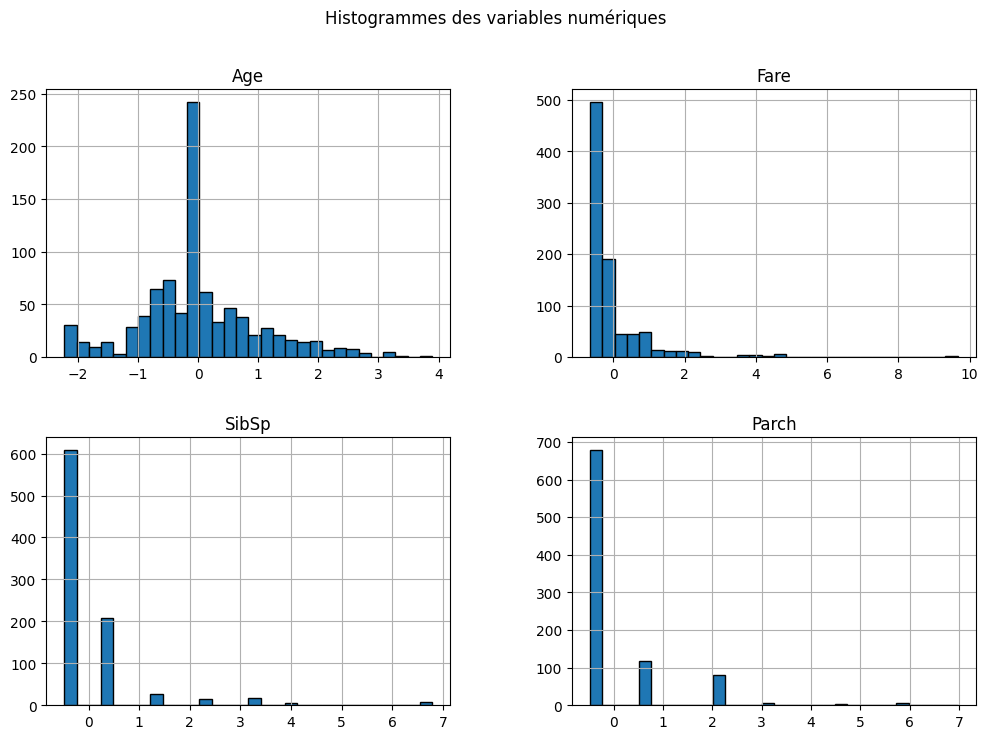

In [13]:
# Histogrammes pour toutes les variables numériques
plt.figure(figsize=(12, 8))
df[['Age', 'Fare', 'SibSp', 'Parch']].hist(bins=30, edgecolor='black', figsize=(12, 8))
plt.suptitle('Histogrammes des variables numériques')
plt.show()


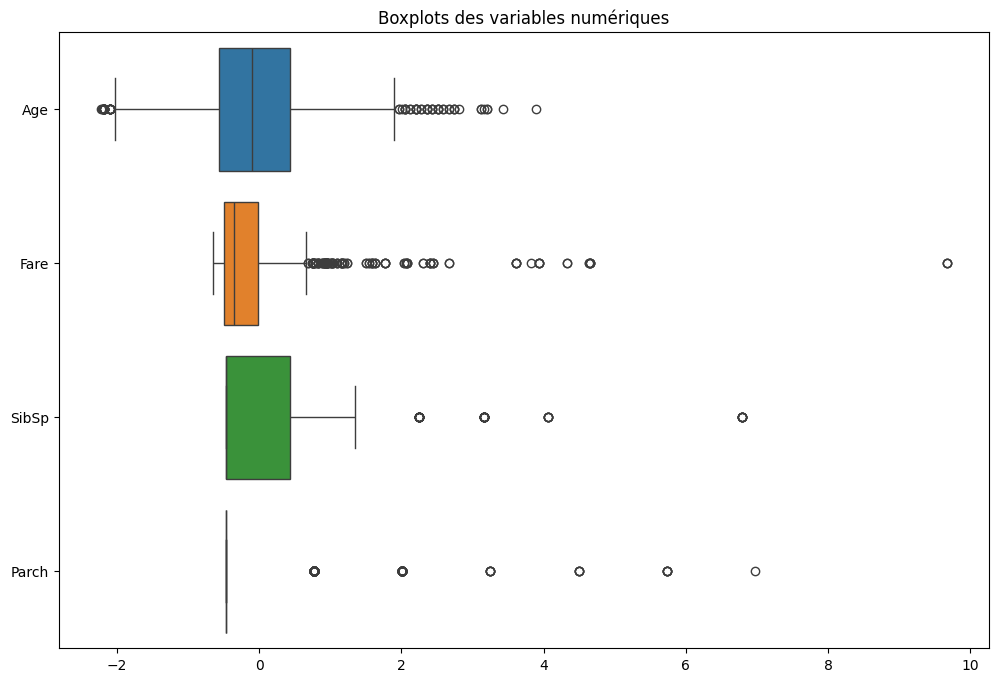

In [14]:
# Boxplot pour toutes les variables numériques
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['Age', 'Fare', 'SibSp', 'Parch']], orient='h')
plt.title('Boxplots des variables numériques')
plt.show()


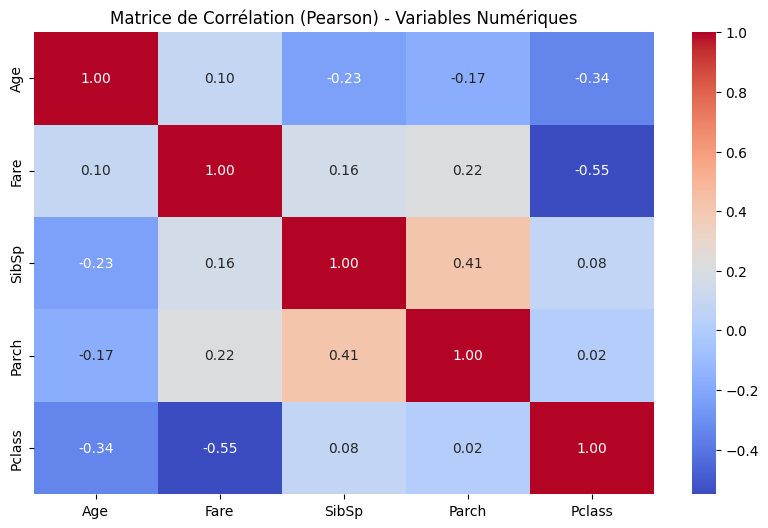

In [15]:
# Sélection des variables numériques
num_features = ["Age", "Fare", "SibSp", "Parch", "Pclass"]  # Pclass est ordinal, on peut le considérer ici aussi

# Matrice de corrélation Pearson
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_features].corr(method='pearson'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de Corrélation (Pearson) - Variables Numériques")
plt.show()


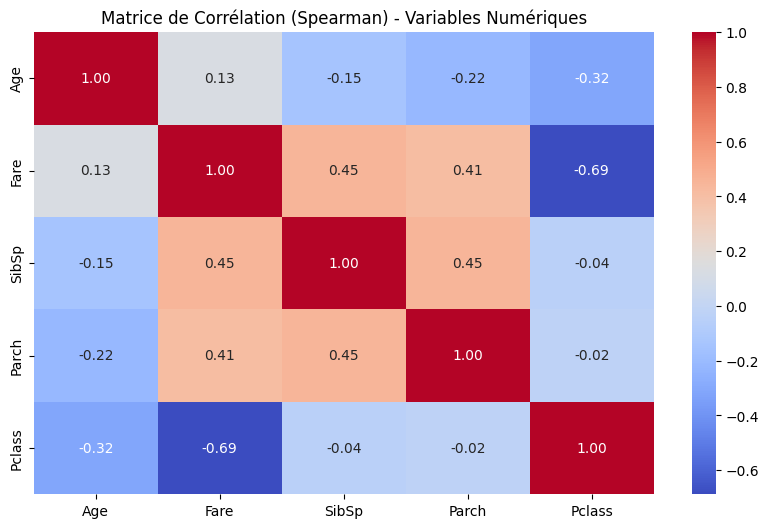

In [16]:
# Matrice de corrélation Spearman (utile si les relations ne sont pas linéaires)
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_features].corr(method='spearman'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de Corrélation (Spearman) - Variables Numériques")
plt.show()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Sex_Encoded', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')


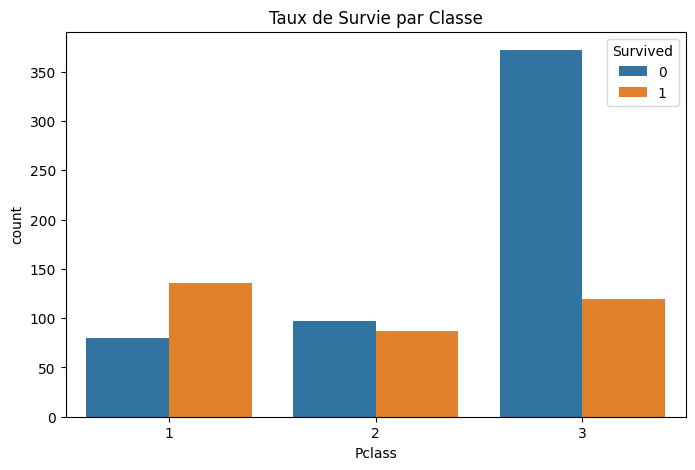

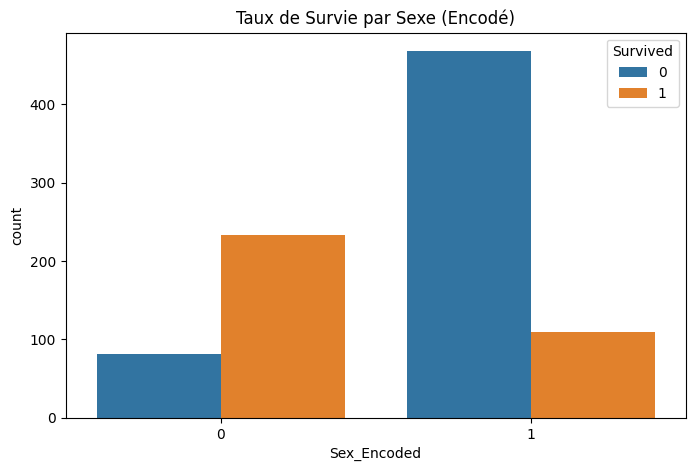

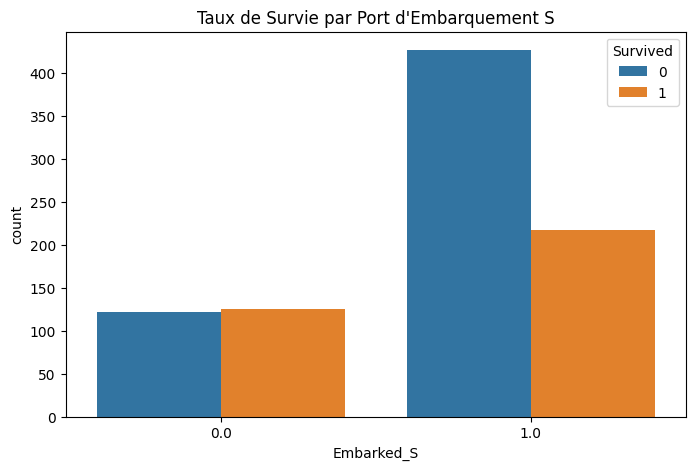

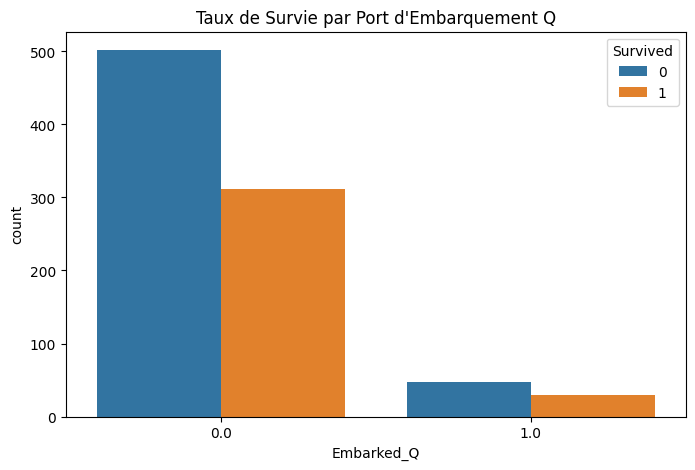

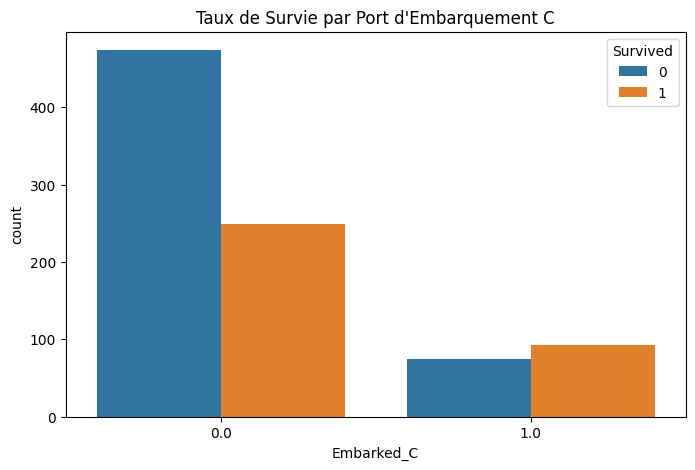

In [17]:
# Countplot pour voir la répartition des survivants selon la classe
plt.figure(figsize=(8, 5))
print(df.columns)

sns.countplot(x="Pclass", hue="Survived", data=df)
plt.title("Taux de Survie par Classe")
plt.show()

# Countplot pour voir la répartition des survivants selon le sexe
plt.figure(figsize=(8, 5))
sns.countplot(x="Sex_Encoded", hue="Survived", data=df)
plt.title("Taux de Survie par Sexe (Encodé)")
plt.show()

# Countplot pour voir la répartition des survivants selon le port d'embarquement
plt.figure(figsize=(8, 5))
sns.countplot(x="Embarked_S", hue="Survived", data=df)
plt.title("Taux de Survie par Port d'Embarquement S")
plt.show()


plt.figure(figsize=(8, 5))
sns.countplot(x="Embarked_Q", hue="Survived", data=df)
plt.title("Taux de Survie par Port d'Embarquement Q")
plt.show()


plt.figure(figsize=(8, 5))
sns.countplot(x="Embarked_C", hue="Survived", data=df)
plt.title("Taux de Survie par Port d'Embarquement C")
plt.show()

In [18]:
from sklearn.model_selection import train_test_split

df_final = df[['Survived', 'Pclass', 'Sex_Encoded', 'Age', 'Fare', 'SibSp', 'Parch', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]

# Afficher le DataFrame final
print(df_final.head())

   Survived  Pclass  Sex_Encoded       Age      Fare     SibSp     Parch  \
0         0       3            1 -0.565736 -0.502445  0.432793 -0.473674   
1         1       1            0  0.663861  0.786845  0.432793 -0.473674   
2         1       3            0 -0.258337 -0.488854 -0.474545 -0.473674   
3         1       1            0  0.433312  0.420730  0.432793 -0.473674   
4         0       3            1  0.433312 -0.486337 -0.474545 -0.473674   

   Embarked_C  Embarked_Q  Embarked_S  
0         0.0         0.0         1.0  
1         1.0         0.0         0.0  
2         0.0         0.0         1.0  
3         0.0         0.0         1.0  
4         0.0         0.0         1.0  


In [19]:
# Importation des librairies nécessaires
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Chargement des données (assurez-vous que df est déjà défini)
# df = pd.read_csv('train.csv')  # Exemple de chargement des données

# Sélection des algorithmes
models = {
    "Régression Logistique": LogisticRegression(),
    "Arbre de Décision": DecisionTreeClassifier(),
    "Forêt Aléatoire": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(probability=True),  # Assurez-vous que SVC puisse donner des probabilités
    "Naive Bayes": GaussianNB(),
    "Réseaux de neurones": MLPClassifier(max_iter=5000, solver='adam', learning_rate_init=0.001)
}

# Séparation des données en X (features) et y (cible)
X = df[['Pclass', 'Sex_Encoded', 'Age', 'Fare', 'SibSp', 'Parch', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]
y = df['Survived']

# Séparation du dataset en train (70%) et test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apprentissage et prédiction pour chaque modèle
results = {}
for name, model in models.items():
    # Cross-validation à 5, 7 et 10 folds
    cv_5 = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy').mean()
    cv_7 = cross_val_score(model, X_train_scaled, y_train, cv=7, scoring='accuracy').mean()
    cv_10 = cross_val_score(model, X_train_scaled, y_train, cv=10, scoring='accuracy').mean()

    # Entraînement du modèle
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Calcul des métriques
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')  # Assurez-vous que c'est un problème binaire
    recall = recall_score(y_test, y_pred, average='binary')  # Pareil pour recall
    f1 = f1_score(y_test, y_pred, average='binary')  # Pareil pour F1
    # Pour AUC-ROC, utiliser les probabilités prédites pour SVC et les autres modèles compatibles
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probabilité pour la classe positive
        auc = roc_auc_score(y_test, y_prob)
    else:
        auc = roc_auc_score(y_test, y_pred)  # Utilisation de y_pred si le modèle ne supporte pas predict_proba

    # Stockage des résultats
    results[name] = {
        "CV (5 folds)": cv_5,
        "CV (7 folds)": cv_7,
        "CV (10 folds)": cv_10,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC-ROC": auc
    }

# Affichage des résultats
results_df = pd.DataFrame(results).T
print(results_df)


                        CV (5 folds)  CV (7 folds)  CV (10 folds)  Accuracy  \
Régression Logistique       0.797703      0.796148       0.792908  0.809701   
Arbre de Décision           0.756065      0.762440       0.785049  0.764925   
Forêt Aléatoire             0.794632      0.800963       0.804301  0.776119   
K-Nearest Neighbors         0.797729      0.794543       0.796057  0.791045   
Support Vector Machine      0.831419      0.834671       0.834665  0.817164   
Naive Bayes                 0.768826      0.776886       0.778520  0.794776   
Réseaux de neurones         0.802542      0.808989       0.815335  0.809701   

                        Precision    Recall  F1 Score   AUC-ROC  
Régression Logistique    0.794118  0.729730  0.760563  0.879956  
Arbre de Décision        0.718182  0.711712  0.714932  0.755810  
Forêt Aléatoire          0.738318  0.711712  0.724771  0.865553  
K-Nearest Neighbors      0.795699  0.666667  0.725490  0.857348  
Support Vector Machine   0.869048  0.

In [20]:
# Importation des librairies nécessaires
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Chargement des données (assurez-vous que df est déjà défini)
# df = pd.read_csv('train.csv')  # Exemple de chargement des données

# Sélection des algorithmes
models = {
    "Régression Logistique": LogisticRegression(),
    "Arbre de Décision": DecisionTreeClassifier(),
    "Forêt Aléatoire": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(probability=True),  # Assurez-vous que SVC puisse donner des probabilités
    "Naive Bayes": GaussianNB(),
    "Réseaux de neurones": MLPClassifier(max_iter=5000, solver='adam', learning_rate_init=0.001)
}

# Séparation des données en X (features) et y (cible)
X = df[['Pclass', 'Sex_Encoded', 'Age', 'Fare', 'SibSp', 'Parch', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]
y = df['Survived']

# Séparation du dataset en train (70%) et test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apprentissage et prédiction pour chaque modèle
results = {}
for name, model in models.items():
    # Cross-validation à 5, 7 et 10 folds
    cv_5 = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy').mean()
    cv_7 = cross_val_score(model, X_train_scaled, y_train, cv=7, scoring='accuracy').mean()
    cv_10 = cross_val_score(model, X_train_scaled, y_train, cv=10, scoring='accuracy').mean()

    # Entraînement du modèle
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Calcul des métriques
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')  # Assurez-vous que c'est un problème binaire
    recall = recall_score(y_test, y_pred, average='binary')  # Pareil pour recall
    f1 = f1_score(y_test, y_pred, average='binary')  # Pareil pour F1
    # Pour AUC-ROC, utiliser les probabilités prédites pour SVC et les autres modèles compatibles
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probabilité pour la classe positive
        auc = roc_auc_score(y_test, y_prob)
    else:
        auc = roc_auc_score(y_test, y_pred)  # Utilisation de y_pred si le modèle ne supporte pas predict_proba

    # Stockage des résultats
    results[name] = {
        "CV (5 folds)": cv_5,
        "CV (7 folds)": cv_7,
        "CV (10 folds)": cv_10,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC-ROC": auc
    }

# Affichage des résultats
results_df = pd.DataFrame(results).T
print(results_df)


                        CV (5 folds)  CV (7 folds)  CV (10 folds)  Accuracy  \
Régression Logistique       0.797703      0.796148       0.792908  0.809701   
Arbre de Décision           0.762503      0.759230       0.785023  0.772388   
Forêt Aléatoire             0.788219      0.808989       0.809114  0.772388   
K-Nearest Neighbors         0.797729      0.794543       0.796057  0.791045   
Support Vector Machine      0.831419      0.834671       0.834665  0.817164   
Naive Bayes                 0.768826      0.776886       0.778520  0.794776   
Réseaux de neurones         0.804168      0.807384       0.807296  0.809701   

                        Precision    Recall  F1 Score   AUC-ROC  
Régression Logistique    0.794118  0.729730  0.760563  0.879956  
Arbre de Décision        0.731481  0.711712  0.721461  0.762409  
Forêt Aléatoire          0.731481  0.711712  0.721461  0.858008  
K-Nearest Neighbors      0.795699  0.666667  0.725490  0.857348  
Support Vector Machine   0.869048  0.

In [21]:
# Importation des librairies nécessaires
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Chargement des données (assurez-vous que df est déjà défini)
# df = pd.read_csv('train.csv')  # Exemple de chargement des données

# Sélection des algorithmes
models = {
    "Régression Logistique": LogisticRegression(),
    "Arbre de Décision": DecisionTreeClassifier(),
    "Forêt Aléatoire": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(probability=True),  # Assurez-vous que SVC puisse donner des probabilités
    "Naive Bayes": GaussianNB(),
    "Réseaux de neurones": MLPClassifier(max_iter=5000, solver='adam', learning_rate_init=0.001)
}

# Séparation des données en X (features) et y (cible)
X = df[['Pclass', 'Sex_Encoded', 'Age', 'Fare', 'SibSp', 'Parch', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]
y = df['Survived']

# Séparation du dataset en train (70%) et test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apprentissage et prédiction pour chaque modèle
results = {}
for name, model in models.items():
    # Cross-validation à 5, 7 et 10 folds
    cv_5 = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy').mean()
    cv_7 = cross_val_score(model, X_train_scaled, y_train, cv=7, scoring='accuracy').mean()
    cv_10 = cross_val_score(model, X_train_scaled, y_train, cv=10, scoring='accuracy').mean()

    # Entraînement du modèle
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Calcul des métriques
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')  # Assurez-vous que c'est un problème binaire
    recall = recall_score(y_test, y_pred, average='binary')  # Pareil pour recall
    f1 = f1_score(y_test, y_pred, average='binary')  # Pareil pour F1
    # Pour AUC-ROC, utiliser les probabilités prédites pour SVC et les autres modèles compatibles
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probabilité pour la classe positive
        auc = roc_auc_score(y_test, y_prob)
    else:
        auc = roc_auc_score(y_test, y_pred)  # Utilisation de y_pred si le modèle ne supporte pas predict_proba

    # Stockage des résultats
    results[name] = {
        "CV (5 folds)": cv_5,
        "CV (7 folds)": cv_7,
        "CV (10 folds)": cv_10,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC-ROC": auc
    }

# Affichage des résultats
results_df = pd.DataFrame(results).T
print(results_df)


                        CV (5 folds)  CV (7 folds)  CV (10 folds)  Accuracy  \
Régression Logistique       0.797703      0.796148       0.792908  0.809701   
Arbre de Décision           0.760890      0.760835       0.786636  0.776119   
Forêt Aléatoire             0.791419      0.797753       0.810701  0.779851   
K-Nearest Neighbors         0.797729      0.794543       0.796057  0.791045   
Support Vector Machine      0.831419      0.834671       0.834665  0.817164   
Naive Bayes                 0.768826      0.776886       0.778520  0.794776   
Réseaux de neurones         0.794555      0.815409       0.808909  0.820896   

                        Precision    Recall  F1 Score   AUC-ROC  
Régression Logistique    0.794118  0.729730  0.760563  0.879956  
Arbre de Décision        0.733945  0.720721  0.727273  0.767229  
Forêt Aléatoire          0.750000  0.702703  0.725581  0.863775  
K-Nearest Neighbors      0.795699  0.666667  0.725490  0.857348  
Support Vector Machine   0.869048  0.

In [22]:
# Installer/mettre à jour les librairies nécessaires
!pip install --upgrade pandas scikit-learn matplotlib seaborn numpy plotly --force-reinstall

# Import des bibliothèques nécessaires
import pandas as pf

# Importer les bibliothèques
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler


  Using cached pandas-2.2.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (89 kB)
  Using cached scikit_learn-1.6.1-cp313-cp313-macosx_12_0_arm64.whl.metadata (31 kB)
  Using cached matplotlib-3.10.1-cp313-cp313-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached numpy-2.2.3-cp313-cp313-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached plotly-6.0.0-py3-none-any.whl.metadata (5.6 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2025.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached scipy-1.15.2-cp313-cp313-macosx_14_0_arm64.whl.metadata (61 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
  Using cached contourpy-1.3.1-cp313-cp313-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none

In [23]:
# Lire le fichier
df = pf.read_csv("bank-additional-full.csv", sep=";")

# Afficher toutes les colonnes sans coupure
pf.set_option("display.max_columns", None)

# Afficher les premières lignes du dataset
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [44]:
# Lire le fichier bank-additional-full.csv
df = pf.read_csv("bank-additional-full.csv", sep=";")

# Vérifier toutes les colonnes (catégorielles et numériques)
all_columns = df.columns

# Rechercher "unknown" dans toutes les colonnes
unknown_counts = df[all_columns].apply(lambda col: (col.astype(str) == "unknown").sum())

# Affichage des résultats pour toutes les colonnes, même celles sans "unknown"
print("Nombre de valeurs 'unknown' dans chaque colonne :")
print(unknown_counts)


Nombre de valeurs 'unknown' dans chaque colonne :
age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64


In [77]:
# Importation des bibliothèques nécessaires
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Charger le fichier bank-additional-full.csv
df = pd.read_csv("bank-additional-full.csv", sep=";")

# Afficher les colonnes disponibles dans le dataset
print("🚀 Colonnes présentes dans le dataset :", df.columns)

# Liste des colonnes à encoder (on vérifie qu'elles existent dans le dataset)
one_hot_cols = ["job", "marital", "contact", "poutcome", "month", "day_of_week"]
label_col = "education"

# Vérifier quelles colonnes sont réellement disponibles
available_one_hot_cols = [col for col in one_hot_cols if col in df.columns]
available_label_col = label_col if label_col in df.columns else None

if available_one_hot_cols or available_label_col:

    # **1. Label Encoding pour "education" (si elle existe)**
    if available_label_col:
        label_encoder = LabelEncoder()
        df["education_encoded"] = df["education"].apply(lambda x: label_encoder.fit_transform([x])[0] if x != "unknown" else x)
        df.drop(columns=["education"], inplace=True)  # Supprimer l'ancienne colonne après encodage

    # **2. One-Hot Encoding pour les colonnes disponibles**
    if available_one_hot_cols:
        one_hot_encoder = OneHotEncoder(sparse_output=False, drop="first", handle_unknown="ignore")

        for col in available_one_hot_cols:
            mask_known = df[col] != "unknown"  # Identifier les valeurs connues

            # Appliquer One-Hot Encoding uniquement sur les valeurs connues
            temp_col = df.loc[mask_known, [col]]
            encoded_values = one_hot_encoder.fit_transform(temp_col)

            # Convertir en DataFrame avec les bons noms de colonnes
            encoded_df = pd.DataFrame(encoded_values, columns=one_hot_encoder.get_feature_names_out([col]), index=df[mask_known].index)

            # Ajouter les nouvelles colonnes encodées au DataFrame original
            df = pd.concat([df, encoded_df], axis=1)

        # **Supprimer uniquement les colonnes qui ne contiennent PAS de "unknown"**
        for col in available_one_hot_cols:
            if (df[col] == "unknown").sum() == 0:
                df.drop(columns=[col], inplace=True)

    # Afficher les premières lignes après encodage
    print("\n🚀 Aperçu du dataset après encodage :")
    print(df.head())

    # Vérifier les valeurs "unknown" restantes
    unknown_counts_after = df.apply(lambda col: (col == "unknown").sum())
    print("\n🚀 Nombre de valeurs 'unknown' par colonne après encodage :")
    print(unknown_counts_after[unknown_counts_after > 0])

else:
    print("⚠️ Aucune des colonnes nécessaires pour l'encodage n'est présente dans le fichier.")


🚀 Colonnes présentes dans le dataset : Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

🚀 Aperçu du dataset après encodage :
   age        job  marital  default housing loan  duration  campaign  pdays  \
0   56  housemaid  married       no      no   no       261         1    999   
1   57   services  married  unknown      no   no       149         1    999   
2   37   services  married       no     yes   no       226         1    999   
3   40     admin.  married       no      no   no       151         1    999   
4   56   services  married       no      no  yes       307         1    999   

   previous  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0         0           1.1          93.994          -36.4      4.857   
1         0

In [82]:
# Vérifier les colonnes du DataFrame après encodage
print("🚀 Colonnes du DataFrame :", df.columns)

# **1. Imputation des colonnes numériques**
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns

for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        if df[col].skew() < 1:  # Si distribution normale, utiliser la moyenne
            df[col] = df[col].fillna(df[col].mean())
        else:  # Sinon utiliser la médiane pour éviter l'effet des outliers
            df[col] = df[col].fillna(df[col].median())

# **2. Vérification et suppression des colonnes encodées inutiles**
one_hot_encoded_cols = [col for col in df.columns if "_" in col and any(original in col for original in ["job", "marital", "contact", "poutcome", "month", "day_of_week"])]

if any("unknown" in col for col in one_hot_encoded_cols):
    print(df[one_hot_encoded_cols].head())  # Afficher un aperçu des colonnes encodées
    df.drop(columns=[col for col in one_hot_encoded_cols if "unknown" in col], inplace=True)  # Supprimer la colonne "unknown" après encodage

# **3. Imputation des colonnes catégorielles (remplacement des "unknown")**
categorical_cols = df.select_dtypes(include=["object"]).columns

for col in categorical_cols:
    if (df[col] == "unknown").sum() > 0:
        df[col] = df[col].replace("unknown", df[col].mode()[0])  # Remplacement par la valeur la plus fréquente

# Vérifier les valeurs manquantes après imputation
print("\n🚀 Valeurs manquantes après imputation :")
print(df.isnull().sum())


🚀 Colonnes du DataFrame : Index(['age', 'job', 'marital', 'default', 'housing', 'loan', 'duration',
       'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'education_encoded',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_married',
       'marital_single', 'contact_telephone', 'poutcome_nonexistent',
       'poutcome_success', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed'],
      dtype='object')

🚀 Valeurs manquantes après imputation :
age                     0
job                     0
marital                 0
default                 0
housing                 0
loan                    0


In [36]:
# Identifier les colonnes numériques à standardiser
numerical_features = ['age', 'duration', 'campaign', 'pdays', 'previous', 
                      'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

print(" Colonnes du dataset :", df.columns)
print("\n Aperçu des types de données :")
print(df.dtypes[df.dtypes == "object"])

# Sélectionner les colonnes numériques uniquement
X_numeric = X.select_dtypes(include=["int64", "float64"])

print("\n Colonnes catégorielles encore sous forme texte :")
print(df.select_dtypes(include=["object"]).columns)


# Appliquer StandardScaler sur les colonnes numériques seulement
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[X_numeric.columns])
X_test_scaled = scaler.transform(X_test[X_numeric.columns])

categorical_features = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]
encoded_features = [col for col in df.columns if any(cat in col for cat in categorical_features)]

# Vérifier si les colonnes encodées existent bien
print("\n Colonnes encodées disponibles :", encoded_features)

# Vérification après transformation
print("\n Statistiques après standardisation :")
print(df[numerical_features].describe())

 Colonnes du dataset : Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

 Aperçu des types de données :
job            object
marital        object
education      object
default        object
housing        object
loan           object
contact        object
month          object
day_of_week    object
poutcome       object
y              object
dtype: object

 Colonnes encodées disponibles : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

 Statistiques après standardisation :
                age      duration      campaign         pdays      previous  \
count  4.118800e+04  4.118800e+04  4.118800e+04  4.118800e+04  4.118800e+04   
mean  -1.880382e-16 -1.397348e-17 -7.590531e-17 -2.580

In [37]:
#1. Statistiques descriptives
print(df.describe())  # Moyenne, médiane, quartiles, etc.
print(df.info())  # Vérifier les types de données et les valeurs manquantes
print(df.isnull().sum())  # Vérifier les valeurs manquantes

                age      duration      campaign         pdays      previous  \
count  4.118800e+04  4.118800e+04  4.118800e+04  4.118800e+04  4.118800e+04   
mean  -1.880382e-16 -1.397348e-17 -7.590531e-17 -2.580781e-16  5.520386e-18   
std    1.000012e+00  1.000012e+00  1.000012e+00  1.000012e+00  1.000012e+00   
min   -2.209365e+00 -9.961775e-01 -5.659220e-01 -5.149443e+00 -3.494943e-01   
25%   -7.699804e-01 -6.027745e-01 -5.659220e-01  1.954139e-01 -3.494943e-01   
50%   -1.942267e-01 -3.019369e-01 -2.049085e-01  1.954139e-01 -3.494943e-01   
75%    6.694038e-01  2.341712e-01  1.561049e-01  1.954139e-01 -3.494943e-01   
max    5.563310e+00  1.797202e+01  1.928982e+01  1.954139e-01  1.379492e+01   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  4.118800e+04    4.118800e+04   4.118800e+04  41188.000000  4.118800e+04  
mean   7.797546e-17   -3.315820e-14  -1.352495e-16      0.000000 -1.024860e-14  
std    1.000012e+00    1.000012e+00   1.00001

<Figure size 1200x800 with 0 Axes>

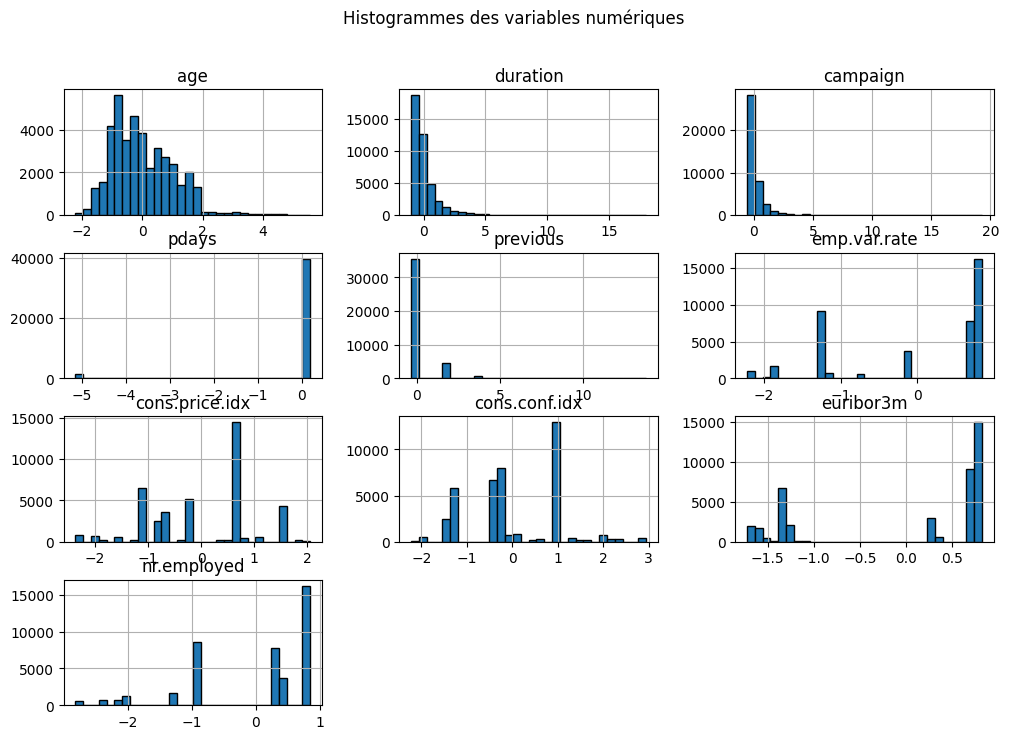

In [38]:
# Définition explicite des variables numériques
numerical_cols = [
    "age", "duration", "campaign", "pdays", "previous",
    "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"
]

# Vérifier que les colonnes existent dans le dataset avant de tracer
numerical_cols = [col for col in numerical_cols if col in df.columns]

# Créer des histogrammes pour toutes les variables numériques
plt.figure(figsize=(12, 8))
df[numerical_cols].hist(bins=30, edgecolor='black', figsize=(12, 8))
plt.suptitle('Histogrammes des variables numériques')
plt.show()

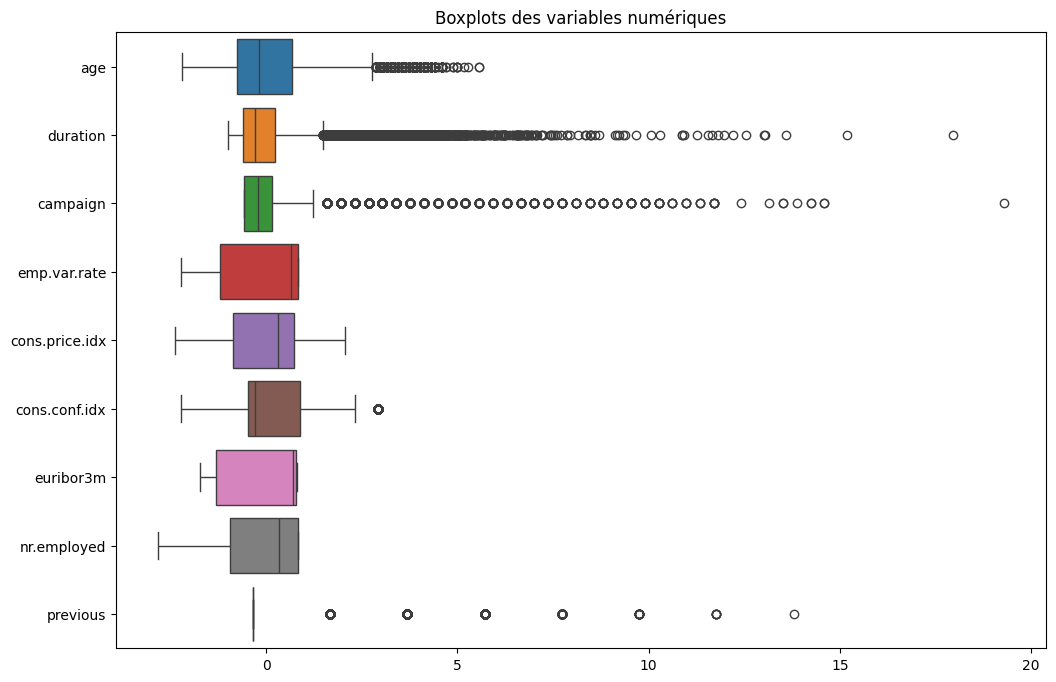

In [39]:
# Import des bibliothèques nécessaires
import matplotlib.pyplot as plt
import seaborn as sns

# Sélection des colonnes spécifiques pour le boxplot
selected_columns = ["age", "duration", "campaign", "emp.var.rate", 
                    "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "previous"]


# Boxplot pour toutes les variables numériques
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[selected_columns], orient='h')
plt.title('Boxplots des variables numériques')
plt.show()


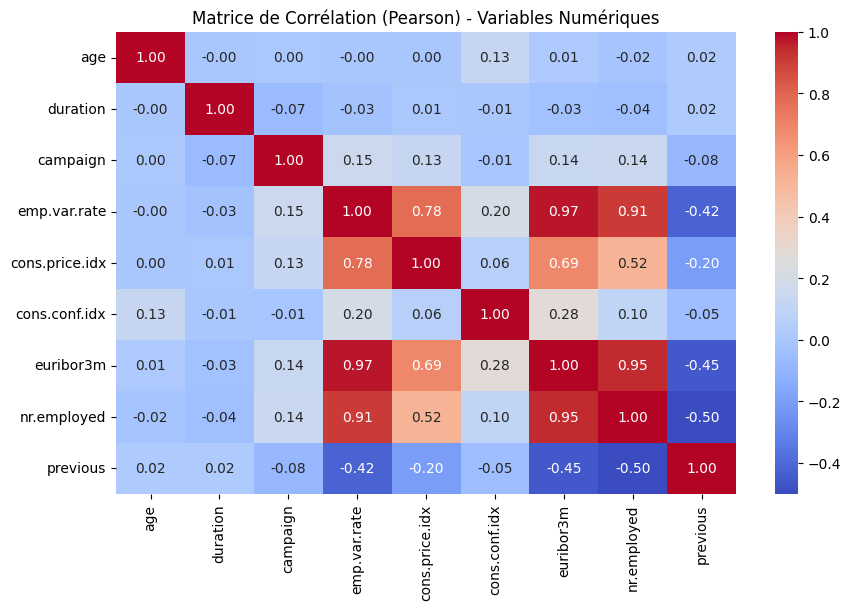

In [40]:
# Sélection des variables numériques
selected_columns = ["age", "duration", "campaign", "emp.var.rate", 
                    "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "previous"]

# Matrice de corrélation Pearson
plt.figure(figsize=(10, 6))
sns.heatmap(df[selected_columns].corr(method='pearson'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de Corrélation (Pearson) - Variables Numériques")
plt.show()

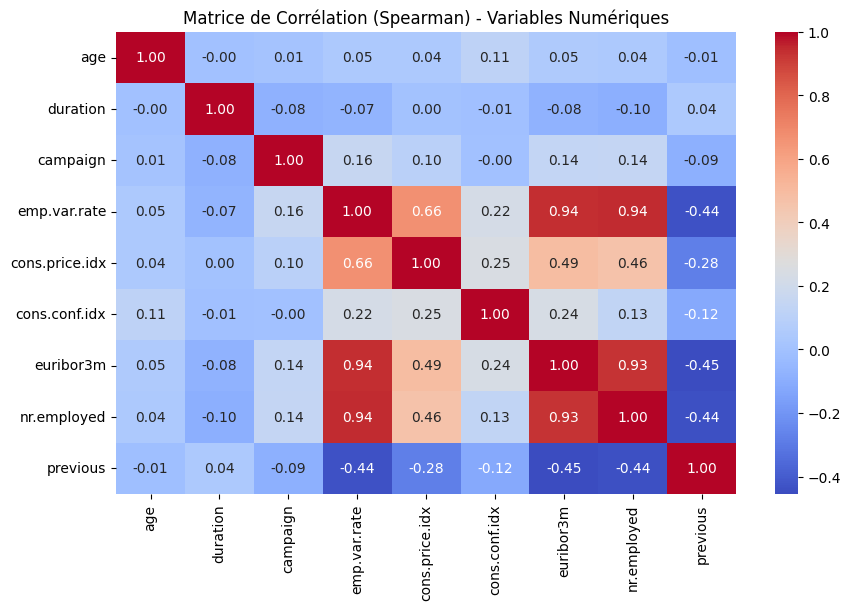

In [41]:
# Matrice de corrélation Spearman (utile si les relations ne sont pas linéaires)
plt.figure(figsize=(10, 6))
sns.heatmap(df[selected_columns].corr(method='spearman'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de Corrélation (Spearman) - Variables Numériques")
plt.show()

🚀 Colonnes présentes dans le dataset : Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


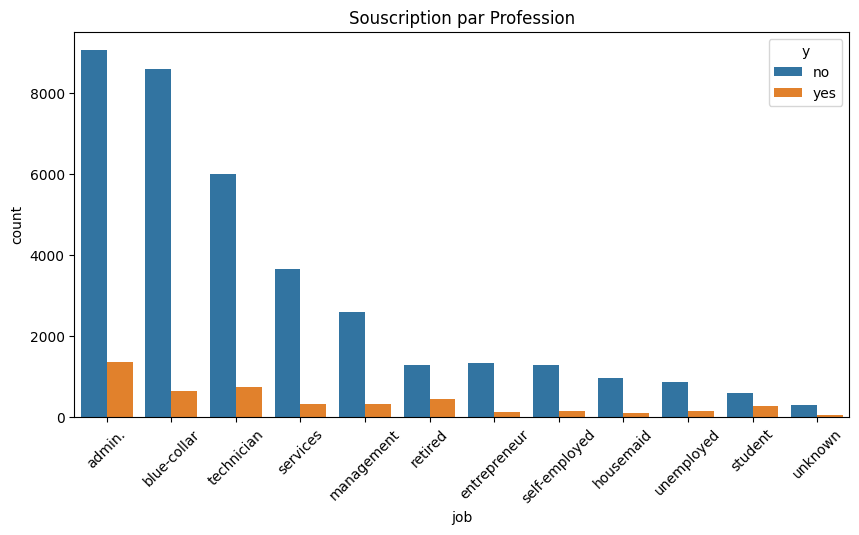

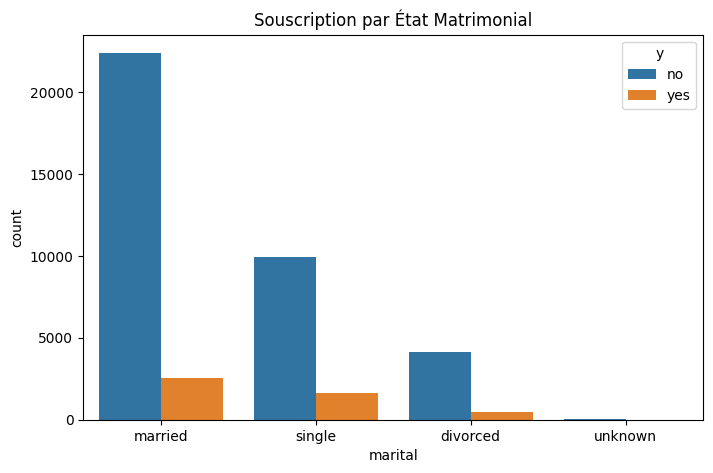

KeyError: 'contact_telephone'

<Figure size 800x500 with 0 Axes>

In [42]:
# Importation des bibliothèques nécessaires
import seaborn as sns
import matplotlib.pyplot as plt

# Vérifier les colonnes disponibles
print("🚀 Colonnes présentes dans le dataset :", df.columns)

# **1. Countplot pour voir la répartition des souscriptions selon la profession (job)**
plt.figure(figsize=(10, 5))
sns.countplot(x="job", hue="y", data=df, order=df["job"].value_counts().index)
plt.title("Souscription par Profession")
plt.xticks(rotation=45)
plt.show()

# **2. Countplot pour voir la répartition des souscriptions selon l'état matrimonial (marital)**
plt.figure(figsize=(8, 5))
sns.countplot(x="marital", hue="y", data=df, order=df["marital"].value_counts().index)
plt.title("Souscription par État Matrimonial")
plt.show()

# **3. Countplot pour voir la répartition des souscriptions selon le mode de contact (contact)**
plt.figure(figsize=(8, 5))
sns.countplot(x="contact_telephone", hue="y", data=df, order=df["contact_telephone"].value_counts().index)
plt.title("Souscription par Mode de Contact")
plt.show()

# **4. Countplot pour voir la répartition des souscriptions selon le mois de contact (month)**
plt.figure(figsize=(10, 5))
sns.countplot(x="month_aug", hue="y", data=df, order=df["month_aug"].value_counts().index)
plt.title("Souscription par Mois")
plt.xticks(rotation=45)
plt.show()

# **5. Countplot pour voir la répartition des souscriptions selon le mois de contact (month)**
plt.figure(figsize=(10, 5))
sns.countplot(x="month_dec", hue="y", data=df, order=df["month_dec"].value_counts().index)
plt.title("Souscription par Mois")
plt.xticks(rotation=45)
plt.show()

# **6. Countplot pour voir la répartition des souscriptions selon le mois de contact (month)**
plt.figure(figsize=(10, 5))
sns.countplot(x="month_jul", hue="y", data=df, order=df["month_jul"].value_counts().index)
plt.title("Souscription par Mois")
plt.xticks(rotation=45)
plt.show()

# **7. Countplot pour voir la répartition des souscriptions selon le mois de contact (month)**
plt.figure(figsize=(10, 5))
sns.countplot(x="month_sep", hue="y", data=df, order=df["month_sep"].value_counts().index)
plt.title("Souscription par Mois")
plt.xticks(rotation=45)
plt.show()

# **8. Countplot pour voir la répartition des souscriptions selon le mois de contact (month)**
plt.figure(figsize=(10, 5))
sns.countplot(x="month_jun", hue="y", data=df, order=df["month_jun"].value_counts().index)
plt.title("Souscription par Mois")
plt.xticks(rotation=45)
plt.show()


# **9. Countplot pour voir la répartition des souscriptions selon le mois de contact (month)**
plt.figure(figsize=(10, 5))
sns.countplot(x="month_mar", hue="y", data=df, order=df["month_mar"].value_counts().index)
plt.title("Souscription par Mois")
plt.xticks(rotation=45)
plt.show()

# **10. Countplot pour voir la répartition des souscriptions selon le mois de contact (month)**
plt.figure(figsize=(10, 5))
sns.countplot(x="month_nov", hue="y", data=df, order=df["month_nov"].value_counts().index)
plt.title("Souscription par Mois")
plt.xticks(rotation=45)
plt.show()

# **11. Countplot pour voir la répartition des souscriptions selon le mois de contact (month)**
plt.figure(figsize=(10, 5))
sns.countplot(x="month_oct", hue="y", data=df, order=df["month_oct"].value_counts().index)
plt.title("Souscription par Mois")
plt.xticks(rotation=45)
plt.show()

# **12. Countplot pour voir la répartition des souscriptions selon le jour de la semaine (day_of_week)**
plt.figure(figsize=(8, 5))
sns.countplot(x="day_of_week_mon", hue="y", data=df, order=df["day_of_week_mon"].value_counts().index)
plt.title("Souscription par Jour de la Semaine")
plt.show()

# **13. Countplot pour voir la répartition des souscriptions selon le jour de la semaine (day_of_week)**
plt.figure(figsize=(8, 5))
sns.countplot(x="day_of_week_thu", hue="y", data=df, order=df["day_of_week_thu"].value_counts().index)
plt.title("Souscription par Jour de la Semaine")
plt.show()

# **13. Countplot pour voir la répartition des souscriptions selon le jour de la semaine (day_of_week)**
plt.figure(figsize=(8, 5))
sns.countplot(x="day_of_week_tue", hue="y", data=df, order=df["day_of_week_tue"].value_counts().index)
plt.title("Souscription par Jour de la Semaine")
plt.show()

# **14. Countplot pour voir la répartition des souscriptions selon le jour de la semaine (day_of_week)**
plt.figure(figsize=(8, 5))
sns.countplot(x="day_of_week_wed", hue="y", data=df, order=df["day_of_week_wed"].value_counts().index)
plt.title("Souscription par Jour de la Semaine")
plt.show()


# **15. Countplot pour voir la répartition des souscriptions selon l'éducation (education_encoded)**
if "education_encoded" in df.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x="education_encoded", hue="y", data=df)
    plt.title("Souscription par Niveau d'Éducation")
    plt.show()


In [43]:
# Importation des bibliothèques nécessaires
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Charger le fichier bank-additional-full.csv
# df = pd.read_csv("bank-additional-full.csv", sep=";")

# Sélection des modèles à tester
models = {
    "Régression Logistique": LogisticRegression(),
    "Arbre de Décision": DecisionTreeClassifier(),
    "Forêt Aléatoire": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(probability=True),  # Permet d'obtenir des probabilités pour AUC-ROC
    "Naive Bayes": GaussianNB(),
    "Réseaux de Neurones": MLPClassifier(max_iter=5000, solver='adam', learning_rate_init=0.001)
}

# **Séparation des données en X (features) et y (cible)**
features = [
    "age", "duration", "campaign", "pdays", "previous", 
    "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"
]
categorical_features = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]

# Vérifier si les colonnes encodées existent et les ajouter
encoded_features = [col for col in df.columns if any(cat in col for cat in categorical_features)]
X = df[features + encoded_features]
y = df["y"].apply(lambda x: 1 if x == "yes" else 0)  # Convertir la cible en 0 (non) et 1 (oui)

# **2️⃣ Séparation du dataset en train (70%) et test (30%)**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# **3️⃣ Normalisation des données**
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **4️⃣ Entraînement et évaluation des modèles**
results = {}
for name, model in models.items():
    # **Validation croisée à 5, 7 et 10 folds**
    cv_5 = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy').mean()
    cv_7 = cross_val_score(model, X_train_scaled, y_train, cv=7, scoring='accuracy').mean()
    cv_10 = cross_val_score(model, X_train_scaled, y_train, cv=10, scoring='accuracy').mean()

    # **Entraînement du modèle**
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # **Calcul des métriques**
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # **Calcul du score AUC-ROC**
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
        auc = roc_auc_score(y_test, y_prob)
    else:
        auc = roc_auc_score(y_test, y_pred)

    # **Stockage des résultats**
    results[name] = {
        "CV (5 folds)": cv_5,
        "CV (7 folds)": cv_7,
        "CV (10 folds)": cv_10,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC-ROC": auc
    }

# **5️⃣ Affichage des résultats sous forme de DataFrame**
results_df = pd.DataFrame(results).T
print(results_df)


ValueError: could not convert string to float: 'blue-collar'

In [ ]:
df[['emp.var.rate', 'cons.conf.idx', 'job', 'education', 'duration', 'campaign', 'housing', 'loan', 'pdays', 'euribor3m', 'cons.price.idx', 'contact', 'month', 'poutcome']]